# **1. Perkenalan Dataset**


**Sumber Dataset**:  
   Dataset diperoleh dari sumber public repositories yaitu Kaggle [Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Menghubungkan Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/StudentsPerformance.csv'

In [4]:
data = pd.read_csv(path)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Ukuran dataset
print(f"Shape dataset: {data.shape}")

# Mengecek Struktur Data
data.info()

Shape dataset: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Duplikasi
print("Jumlah duplikasi:", data.duplicated().sum())

# Missing values
null_summary = data.isnull().sum()
print("Missing values setiap kolom:")
print(null_summary)

Jumlah duplikasi: 0
Missing values setiap kolom:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
# Statistik Deskriptif
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Nilai 0 pada 'math score' berhasil diganti dengan median.



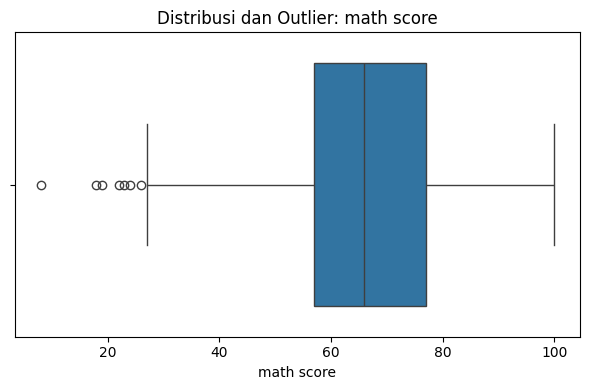

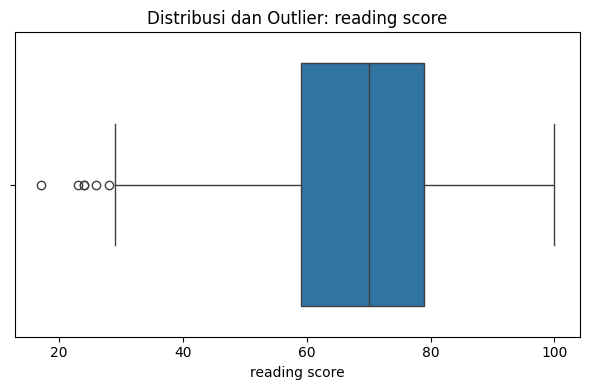

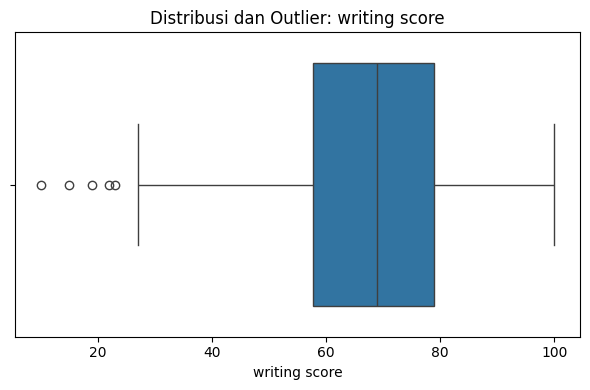

In [8]:
# Mendefinisikan kolom numerik secara otomatis
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Mengganti nilai 0 pada math score
median_math = data['math score'].median()
data.loc[data['math score'] == 0, 'math score'] = median_math

print("Nilai 0 pada 'math score' berhasil diganti dengan median.\n")

# Boxplot setiap kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=col)
    plt.title(f"Distribusi dan Outlier: {col}")
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Menentukan kolom numerik dan kategorikal
num_features = ['math score', 'reading score', 'writing score']
cat_features = ['gender', 'race/ethnicity', 'parental level of education',
                'lunch', 'test preparation course']

In [10]:
# Inisialisasi scaler dan encoder
num_scaler = StandardScaler()
cat_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [11]:
# Membuat transformer kolom
transformer = ColumnTransformer(
    transformers=[
        ('numeric', num_scaler, num_features),
        ('categorical', cat_encoder, cat_features)
    ],
    remainder='drop'
)

In [12]:
# Melakukan preprocessing pada dataset
processed_array = transformer.fit_transform(data)

In [13]:
# Mengambil nama kolom hasil one-hot encoding
ohe_columns = transformer.named_transformers_['categorical'].get_feature_names_out(cat_features)

# Menggabungkan kolom numerik dan hasil encoding
final_columns = num_features + list(ohe_columns)

# Mengubah hasil transform menjadi DataFrame
processed_df = pd.DataFrame(processed_array, columns=final_columns)

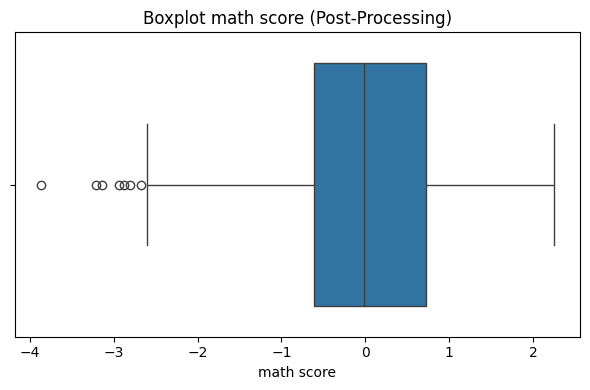

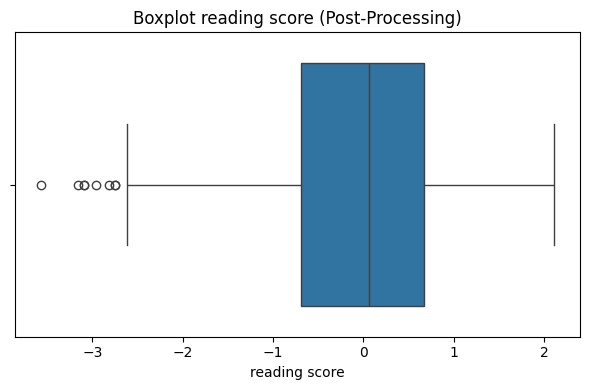

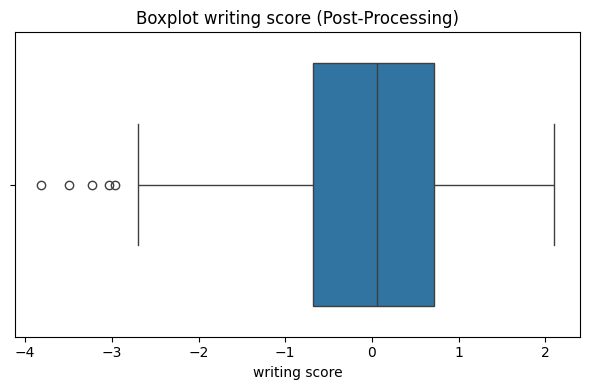

In [14]:
# Visualisasi boxplot untuk kolom numerik (setelah preprocessing)
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=processed_df, x=feature)
    plt.title(f"Boxplot {feature} (Post-Processing)")
    plt.tight_layout()
    plt.show()

In [15]:
# Simpan ke CSV
output_path = '/content/drive/MyDrive/StudentsPerformance_preprocessed.csv'
processed_df.to_csv(output_path, index=False)
print(f"\nDataset hasil preprocessing berhasil disimpan di: {output_path}")


Dataset hasil preprocessing berhasil disimpan di: /content/drive/MyDrive/StudentsPerformance_preprocessed.csv
